### Libs

In [3]:
# Re-import necessary libraries after kernel reset
import pandas as pd
import matplotlib.pyplot as plt

### To run in colab

In [4]:
# To work on google colab
# Connect
from google.colab import drive
drive.mount('/content/drive')

# Move to work folder location
%cd /content/drive/MyDrive/Capstone/llm_steam_bot/src/recommender

# Check location
!ls

ModuleNotFoundError: No module named 'google.colab'

### Upload files

In [4]:
# Memory based collaborative metrics
df_memory_based_hit_rate = pd.read_csv('../../data/df_memory_based_hit_rate.csv')
df_memory_based_precision = pd.read_csv('../../data/df_memory_based_precision.csv')
df_memory_based_ndcg = pd.read_csv('../../data/df_memory_based_ndcg.csv')

# Matrix based collaborative metrics
df_matrix_factorization_hit_rate = pd.read_csv('../../data/df_matrix_factorization_hit_rate.csv')
df_matrix_factorization_precision = pd.read_csv('../../data/df_matrix_factorization_precision.csv')
df_matrix_factorization_ndcg = pd.read_csv('../../data/df_matrix_factorization_ndcg.csv')

### Plot functions

In [11]:
def plot_offline_eval(df, performance_metric, metric_name, y_scale_min=0.1,):
  df["threshold"] = df["threshold"].astype(str)

  # Plot two subplots side by side without grid and with threshold as string
  fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

  titles = {
      100: f"{metric_name}@k - Top 100 Games",
      1000: f"{metric_name}@k - Top 1000 Games"
  }

  for i, total_games in enumerate([100, 1000]):
      ax = axes[i]
      df_subset = df[df["total_games"] == total_games]
      for threshold in df_subset["threshold"].unique():
          label = f"{threshold}"
          line = df_subset[df_subset["threshold"] == threshold]
          ax.plot(line["k"], line[performance_metric], marker='o', label=label)
      ax.set_title(titles[total_games])
      ax.set_xlabel("k")
      ax.set_xticks(sorted(df["k"].unique()))
      ax.set_ylim(y_scale_min, 1.0)

  axes[0].set_ylabel(f"{performance_metric}")
  axes[1].legend(title="Threshold", loc='lower right')
  plt.tight_layout()
  plt.show()

In [28]:
def plot_offline_eval_1000(df_strategy_1, df_strategy_2, performance_metric, metric_name, y_scale_min=0.1,):
  df_strategy_1["threshold"] = df_strategy_1["threshold"].astype(str)
  df_strategy_2["threshold"] = df_strategy_2["threshold"].astype(str)
  df_strategy_1 =  df_strategy_1[df_strategy_1['total_games']==1000]
  df_strategy_1['strategy'] = 'memory'
  df_strategy_2 =  df_strategy_2[df_strategy_2['total_games']==1000]
  df_strategy_2['strategy'] = 'matrix'
  df = pd.concat([df_strategy_1,df_strategy_2])

  # Plot two subplots side by side without grid and with threshold as string
  fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

  titles = {
      'memory': f"Memory based: {metric_name}@k",
      'matrix': f"Matrix Factorization: {metric_name}@k"
  }

  #for i, total_games in enumerate([1000]):
  for i, strategy in enumerate(['memory', 'matrix']):
      ax = axes[i]
      df_subset = df[df["strategy"] == strategy]
      for threshold in df_subset["threshold"].unique():
          label = f"{threshold}"
          line = df_subset[df_subset["threshold"] == threshold]
          ax.plot(line["k"], line[performance_metric], marker='o', label=label)
      ax.set_title(titles[strategy])
      ax.set_xlabel("k")
      ax.set_xticks(sorted(df["k"].unique()))
      ax.set_ylim(y_scale_min, 1.0)

  axes[0].set_ylabel(f"{performance_metric}")
  axes[1].legend(title="Threshold", loc='lower right')
  plt.tight_layout()
  plt.show()

### Without top 100 games

C:\Users\lucas\AppData\Local\Temp\ipykernel_7116\123023645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_strategy_1['strategy'] = 'memory'
C:\Users\lucas\AppData\Local\Temp\ipykernel_7116\123023645.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_strategy_2['strategy'] = 'matrix'


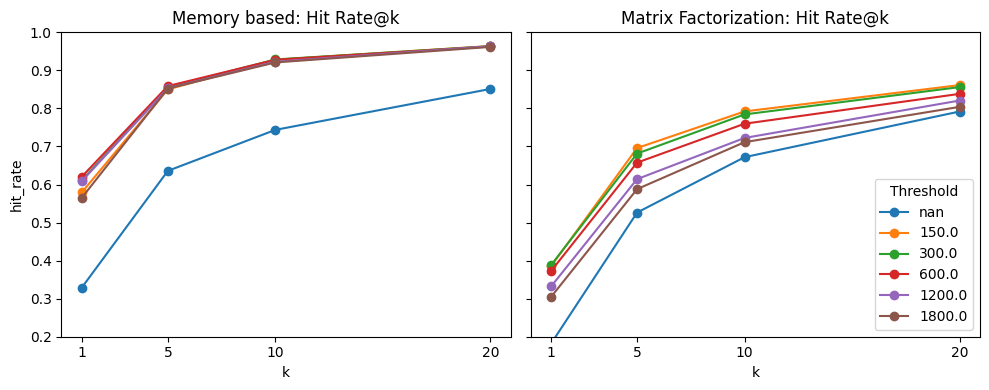

C:\Users\lucas\AppData\Local\Temp\ipykernel_7116\123023645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_strategy_1['strategy'] = 'memory'
C:\Users\lucas\AppData\Local\Temp\ipykernel_7116\123023645.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_strategy_2['strategy'] = 'matrix'


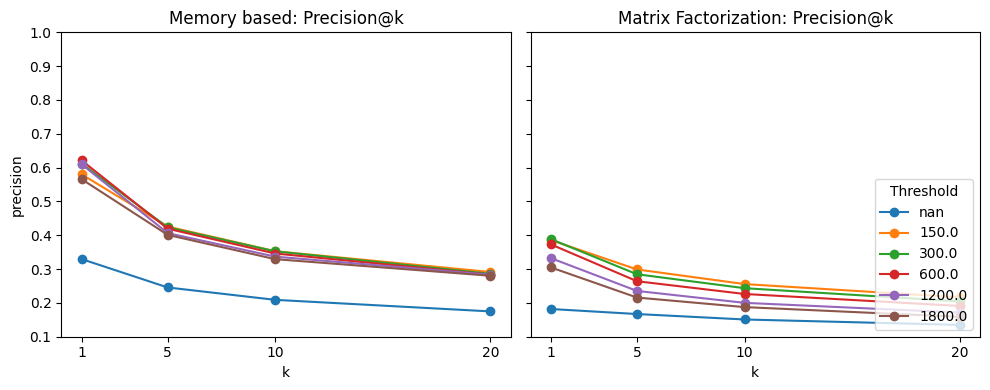

C:\Users\lucas\AppData\Local\Temp\ipykernel_7116\123023645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_strategy_1['strategy'] = 'memory'
C:\Users\lucas\AppData\Local\Temp\ipykernel_7116\123023645.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_strategy_2['strategy'] = 'matrix'


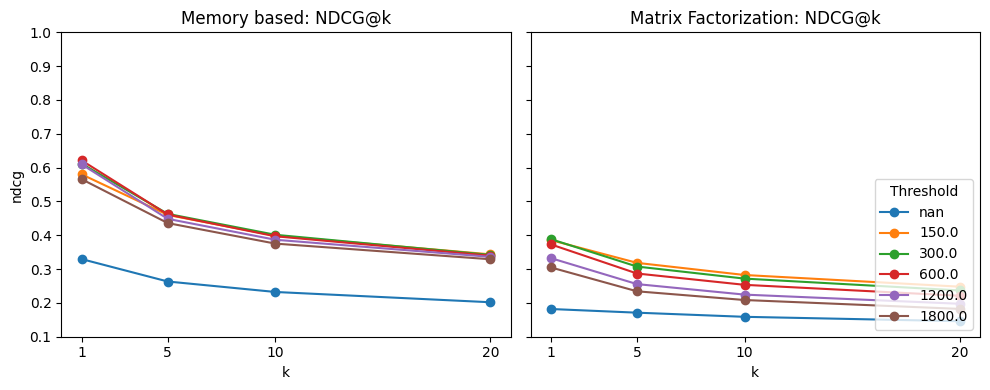

In [29]:
plot_offline_eval_1000(df_memory_based_hit_rate, df_matrix_factorization_hit_rate, "hit_rate", 'Hit Rate', 0.2)
plot_offline_eval_1000(df_memory_based_precision, df_matrix_factorization_precision, "precision", 'Precision', 0.1)
plot_offline_eval_1000(df_memory_based_ndcg, df_matrix_factorization_ndcg,"ndcg", "NDCG", 0.1)

### Memory based eval

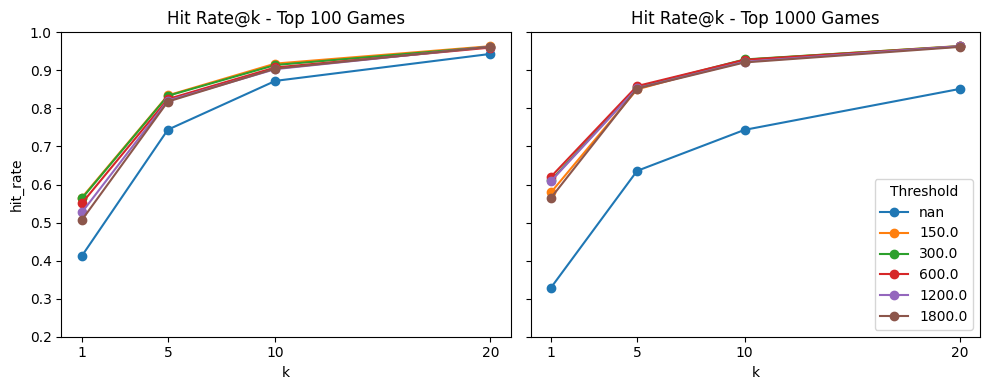

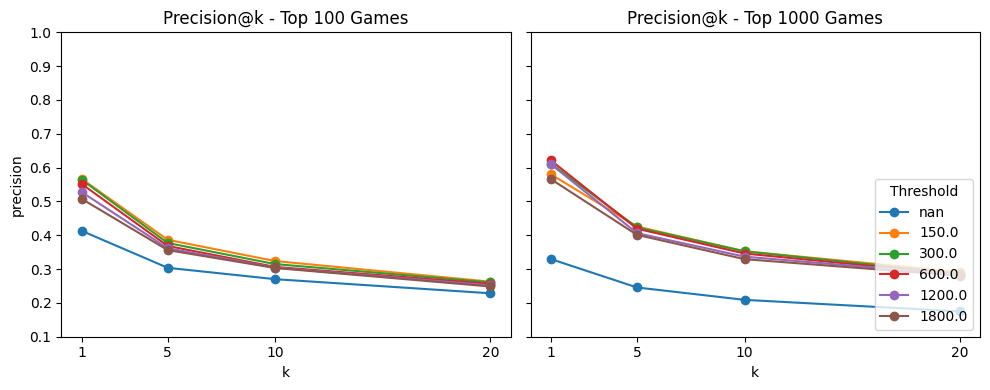

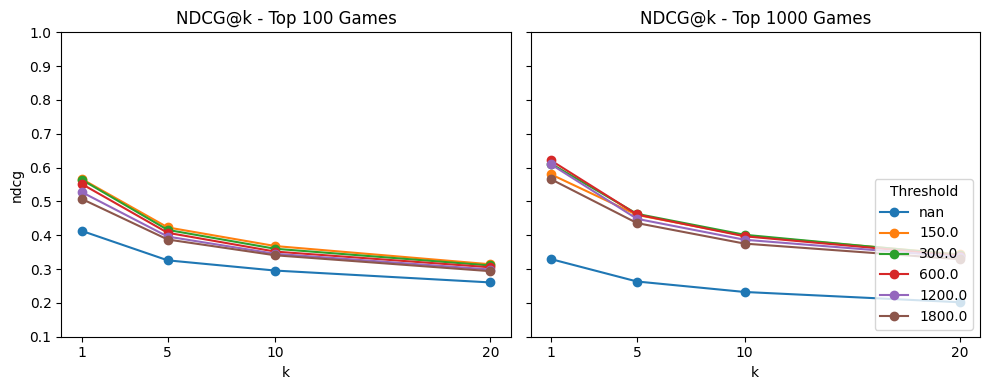

In [5]:
plot_offline_eval(df_memory_based_hit_rate, "hit_rate", 'Hit Rate', 0.2)
plot_offline_eval(df_memory_based_precision, "precision", 'Precision', 0.1)
plot_offline_eval(df_memory_based_ndcg, "ndcg", "NDCG", 0.1)

### Matrix factorization eval

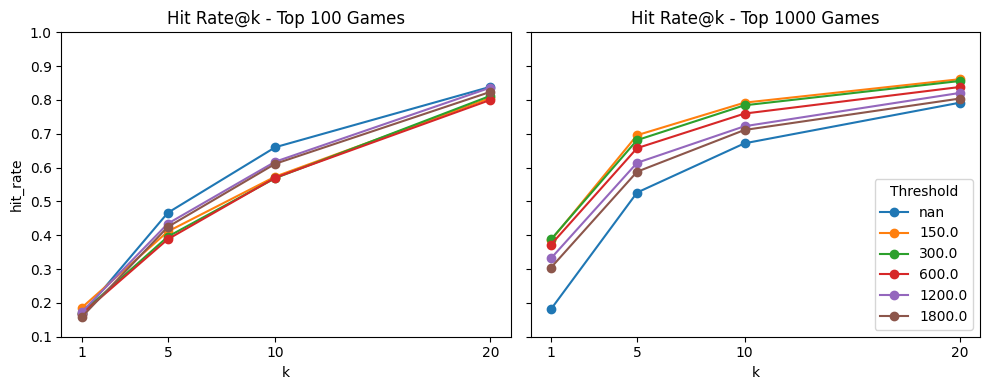

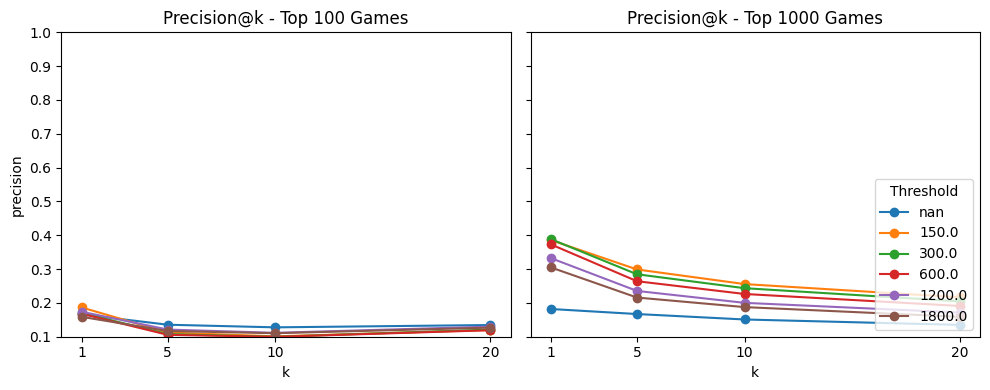

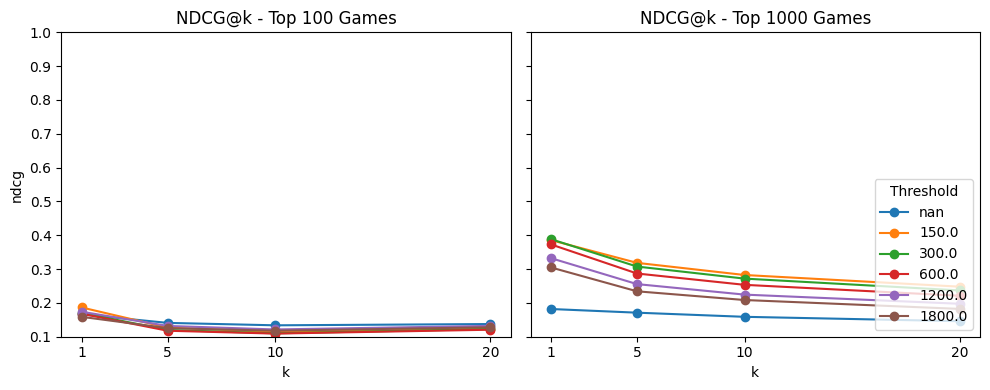

In [6]:
plot_offline_eval(df_matrix_factorization_hit_rate, "hit_rate", 'Hit Rate', 0.1)
plot_offline_eval(df_matrix_factorization_precision, "precision", 'Precision', 0.1)
plot_offline_eval(df_matrix_factorization_ndcg, "ndcg", 'NDCG',0.1)

In [18]:
for i, total_games in enumerate(['x','y']):
    print(i)
    print(total_games)

0
x
1
y
